### Medical Image Segmentation

Medical image segmentation is the process of separating an image into multiple segments or regions with similar characteristics. In the context of medical imaging, this is often used to identify and isolate specific structures or tissues of interest within the image.

There are many different techniques for performing medical image segmentation, including both manual and automated methods. Manual methods involve a human expert carefully tracing the boundaries of the structures of interest, while automated methods use algorithms and machine learning techniques to perform the segmentation automatically.

Some common techniques used for medical image segmentation include thresholding, edge detection, region growing, clustering, and convolutional neural networks (CNNs). Thresholding involves setting a threshold value to separate pixels with values above and below the threshold. Edge detection involves finding the edges of structures in the image and then segmenting based on those edges. Region growing involves starting with a seed pixel and then growing a region by adding adjacent pixels that meet certain criteria. Clustering involves grouping pixels with similar properties together. CNNs are a type of deep learning algorithm that can learn to perform image segmentation automatically by training on a large dataset of labeled images.

Medical image segmentation is an important tool in medical imaging, as it can help clinicians to identify and isolate specific structures or tissues of interest within an image. This can aid in diagnosis, treatment planning, and monitoring of various medical conditions.

### MRI Data and Image Registration

Magnetic resonance imaging (MRI) is a medical imaging technique that uses a magnetic field and radio waves to create detailed images of the body's internal structures. MRI images can provide valuable information for diagnosing and treating a variety of medical conditions, but they can also be complex and difficult to interpret. Image registration is a technique that can be used to align and compare multiple MRI images, making it easier for clinicians to identify changes over time or differences between patients.

Image registration involves aligning two or more images so that they share a common coordinate system. This can be done using a variety of techniques, including intensity-based registration, feature-based registration, and deformable registration. Intensity-based registration involves aligning images based on their pixel intensity values, while feature-based registration involves identifying and matching specific features in the images. Deformable registration involves allowing the images to deform and adjust to each other to achieve the best alignment.

There are many applications for image registration in MRI, including:

Comparison of images taken at different times: Image registration can be used to align MRI images taken at different times, allowing clinicians to monitor changes over time and track the progression of diseases.

Comparison of images from different modalities: MRI images can be compared with images from other modalities, such as computed tomography (CT) or positron emission tomography (PET), using image registration.

Integration of multiple MRI images: Image registration can be used to combine multiple MRI images of the same patient, providing a more complete and detailed view of the internal structures.

Planning and guidance for surgical procedures: Image registration can be used to plan surgical procedures and guide surgeons during the operation, helping to ensure accurate and precise placement of surgical instruments.

Overall, MRI image registration is a valuable technique that can enhance the accuracy and usefulness of MRI imaging in a variety of clinical settings.

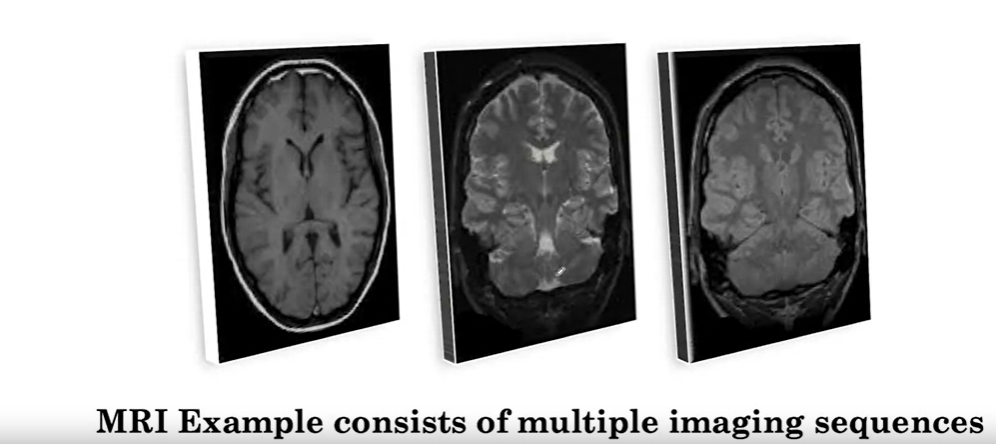

In this lesson, we will learn how to train and evaluate a segmentation model to identify tumors in MRI data using the UNet architecture. To represent the MRI data, we need to combine multiple 3D volumes from different sequences into one 3D volume by treating each sequence as a different channel. We can then use image registration to align the images if necessary. Once the images are aligned, we can combine them to produce one image with multiple channels. This image will be used as the input for our segmentation model. We will discuss the challenges associated with working with 3D medical data and how we can tackle them. By the end of this lesson, you will have a good understanding of how to prepare the MRI data and input it into the segmentation model for tumor identification.

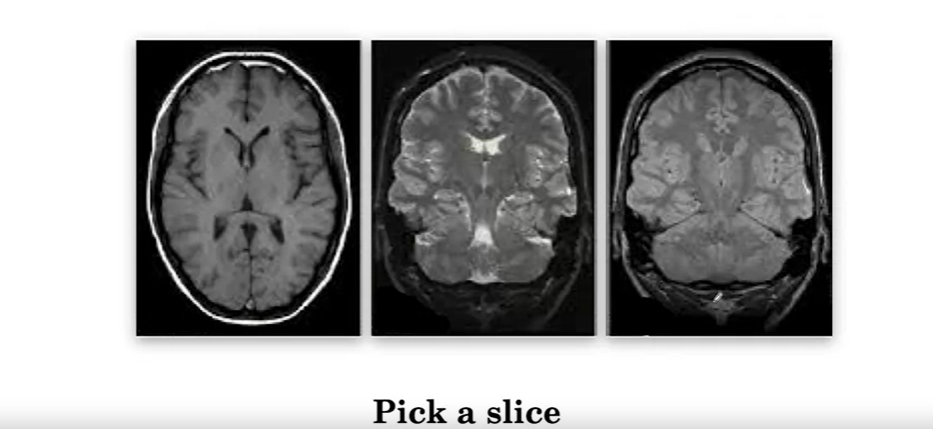

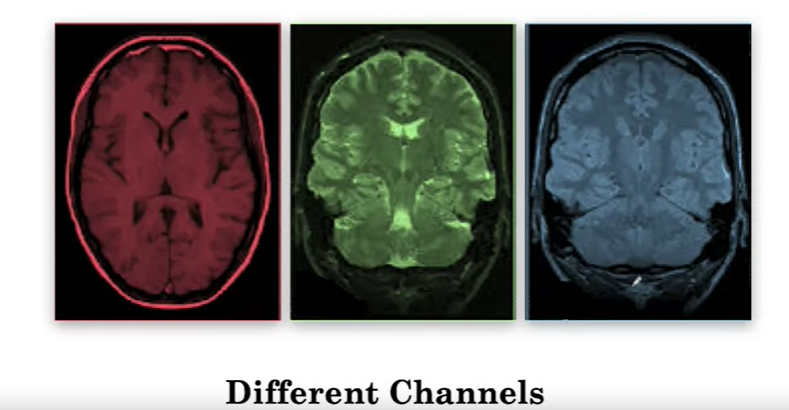

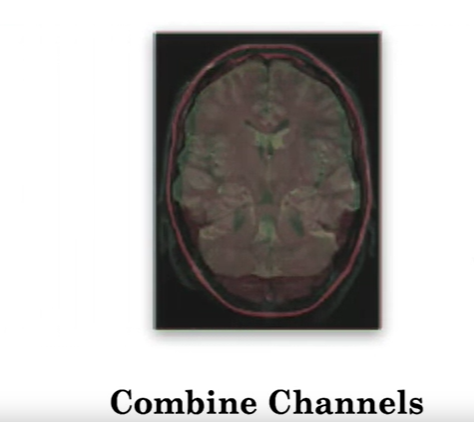

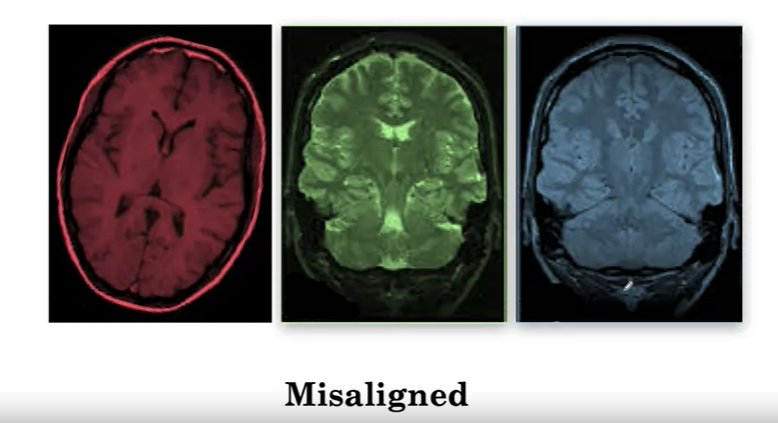

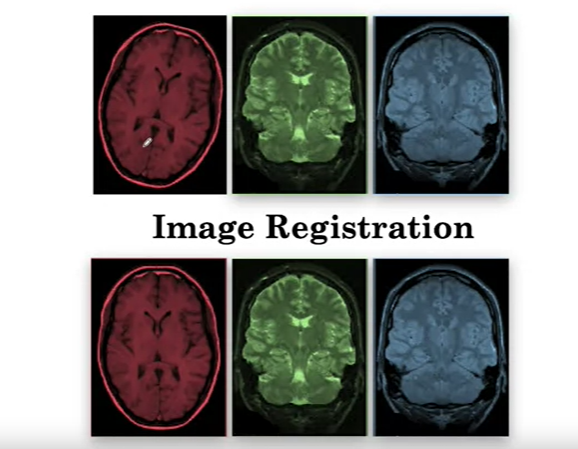

### Two Approaches to Segmentation with MRI Data for Brain Tumor Segmentation

In the 2D approach, the 3D MRI volume is broken up into many 2D slices, each passed through a segmentation model to generate a segmentation for every slice. These 2D slices are then combined to form the 3D output volume of the segmentation. However, this approach may lose important 3D context. In the 3D approach, the 3D MRI volume is broken up into many 3D subvolumes, each passed through a segmentation model to generate a segmentation for the subvolume. These subvolumes are then aggregated to form a segmentation map for the whole volume, capturing some context in all of the width, height, and depth dimensions. However, this approach may still lose important spatial context.

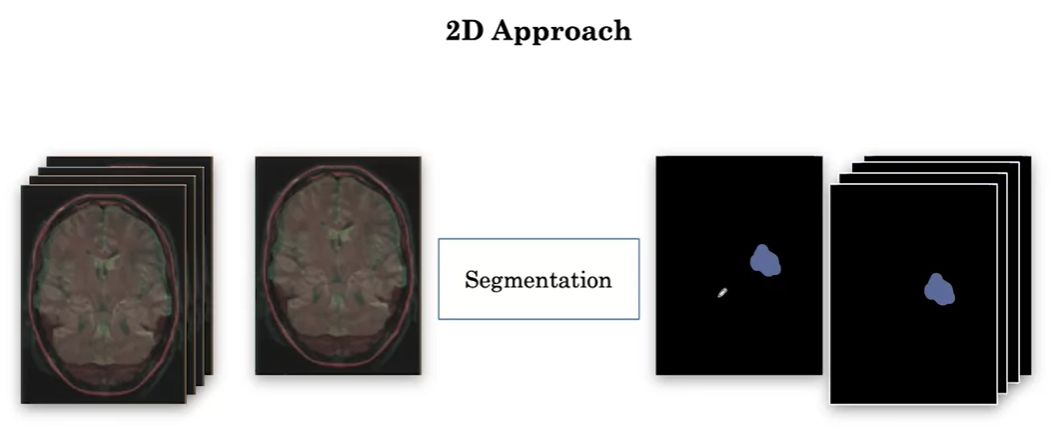

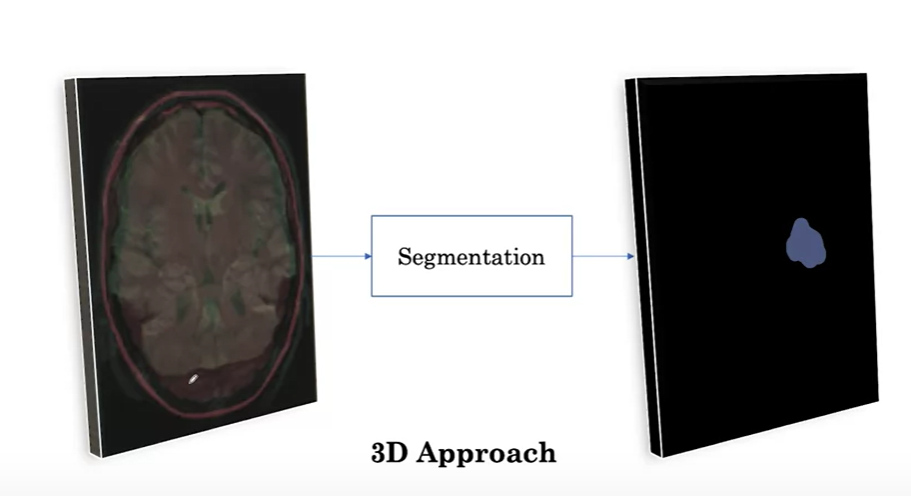

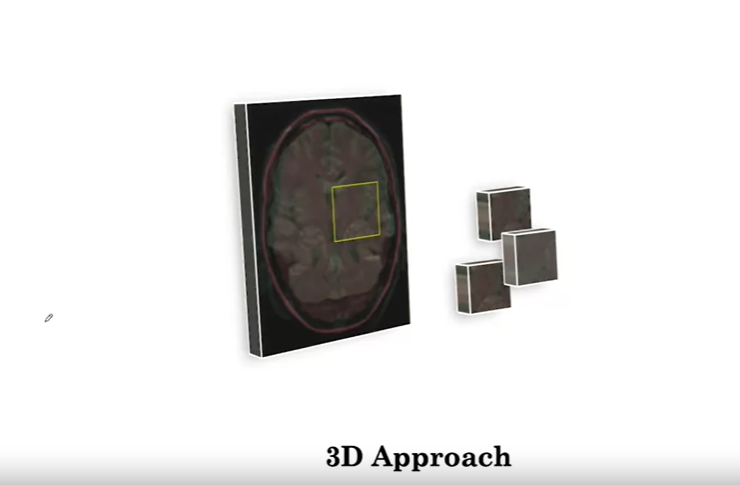

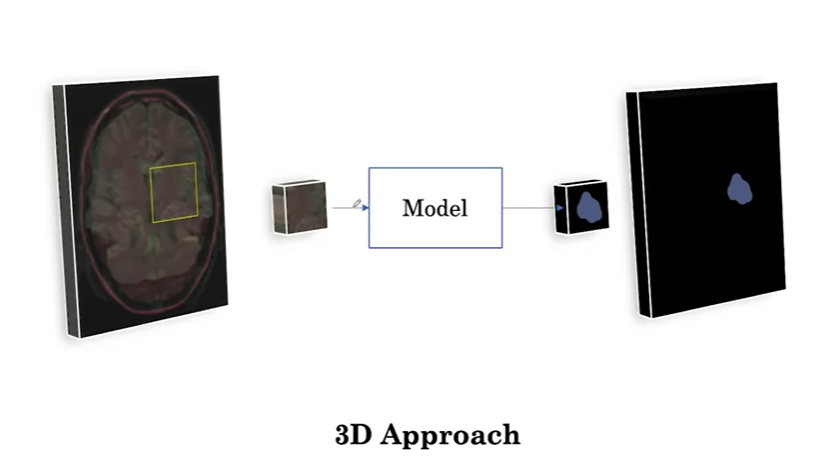

### Convolutional Neural Networks

Convolutional Neural Networks (CNNs) are a type of neural network commonly used in computer vision tasks, such as image classification, object detection, and segmentation. They are particularly effective at capturing spatial relationships in images through the use of convolutional layers, which apply a set of learned filters to the input image to extract features. Pooling layers are then used to downsample the output of the convolutional layers, reducing the spatial dimensionality of the features. These extracted features are then fed into one or more fully connected layers to make a final prediction. CNNs have been used in a wide range of applications, including medical image analysis, natural language processing, and even playing games like Go and chess.

### 2D U-Net and 3D U-Net

The U-Net is a popular architecture for segmentation, initially designed for biomedical image segmentation. It consists of a contracting path and an expanding path, with repeated application of convolution and pooling operations in the contracting path to reduce the feature maps' spatial size and up-sampling and up-convolution steps in the expanding path to restore the original image size. The 2D version of U-Net can be trained on input-output pairs of 2D slices, while the 3D version, called the 3D U-Net, can be trained on subvolume input and outputs as part of the 3D approach. In the 3D U-Net, 2D operations are replaced with their 3D counterparts, allowing us to pass in 3D subvolumes and get an output for every voxel in the volume specifying the probability of a tumor.

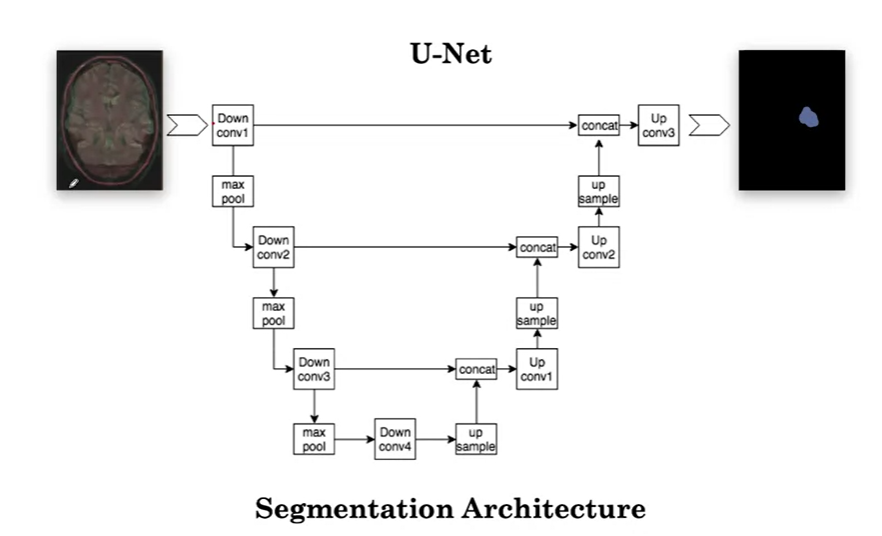

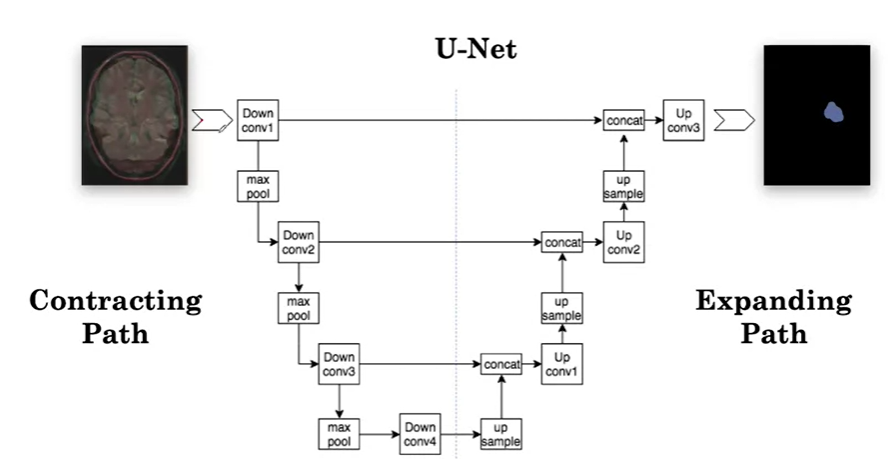

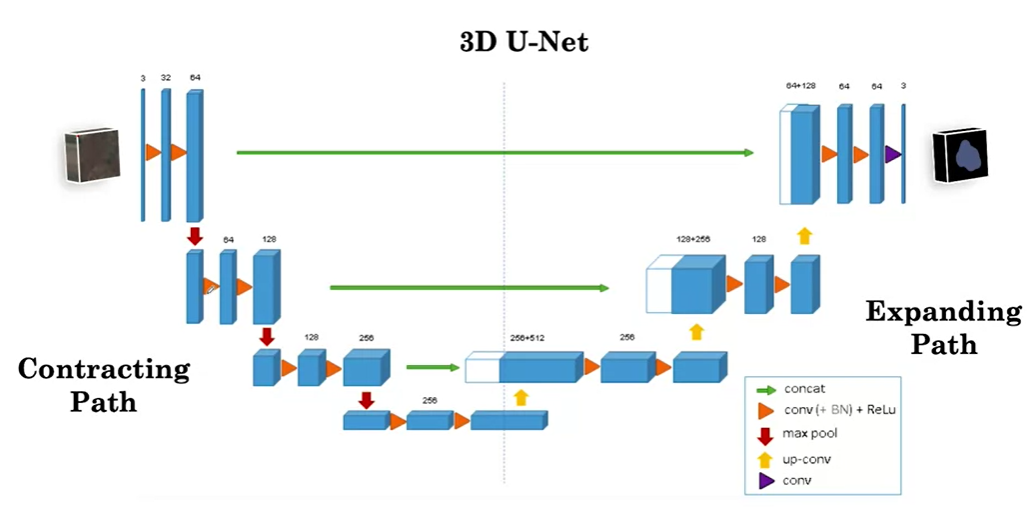

### Data Augmentation for Segmentation

Data augmentation is a technique used to artificially increase the size of a dataset by creating new examples through various transformations of the original data. This technique can be used in segmentation tasks to create new training examples with minimal additional effort, and has been shown to improve model performance.

Common augmentation techniques for segmentation include flipping, rotating, scaling, and cropping the images, as well as adjusting brightness and contrast levels. These transformations can be applied to both the input image and the corresponding segmentation mask to create new paired examples for training.

Data augmentation can help improve model generalization by exposing it to a wider range of variations in the training data, making it more robust to different real-world scenarios. However, it is important to ensure that the augmentations do not introduce unrealistic or incorrect labeling in the segmentation masks, as this could harm model performance. Therefore, it is essential to carefully design and validate the augmentation pipeline to ensure that the synthetic examples accurately reflect the variability of the real data.

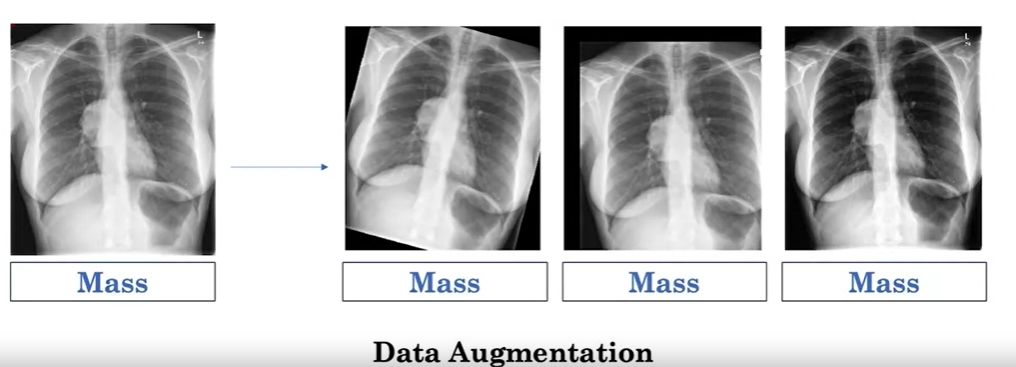

Data augmentation can be applied to segmentation in a similar way to classification, but with some key differences. The segmentation output must also be transformed, and the transformations must apply to the whole 3D volume.

### Loss Function for Image Segmentation

In image segmentation, we want to be able to specify the error in our model's predictions compared to the ground truth. To do this, we use a loss function. One common loss function used in segmentation is the dice coefficient loss. The dice coefficient is a measure of overlap between the predicted segmentation and the ground truth. It ranges from 0 to 1, where 0 indicates no overlap and 1 indicates perfect overlap. The dice coefficient loss is defined as 1 - 2 * (intersection between predicted and ground truth) / (sum of pixels in predicted + sum of pixels in ground truth). The intersection between predicted and ground truth refers to the number of pixels that are correctly labeled as tumor in both the predicted segmentation and the ground truth. The sum of pixels in predicted refers to the total number of pixels labeled as tumor in the predicted segmentation, and the sum of pixels in ground truth refers to the total number of pixels labeled as tumor in the ground truth. By minimizing the dice coefficient loss, we aim to maximize the overlap between the predicted segmentation and the ground truth.

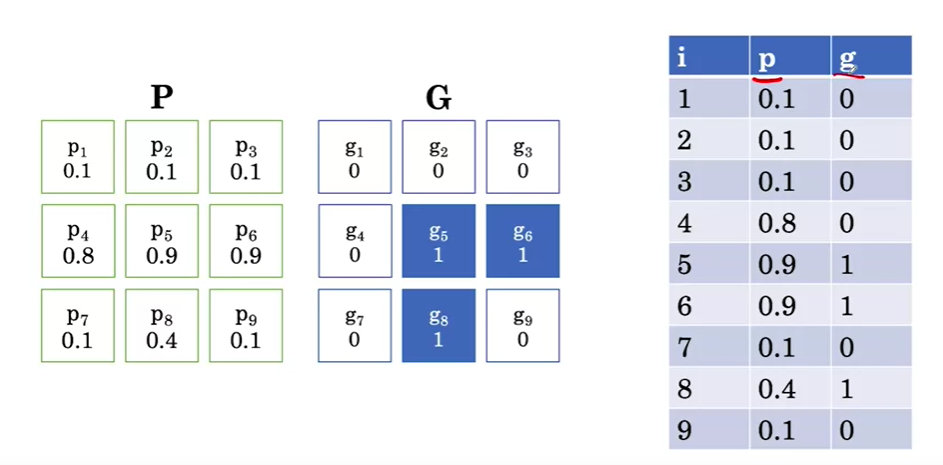

The loss function must be designed to measure the error between the model prediction and the ground truth. An example was given using a simple 2D example with 9 pixels, where capital P represents the output of the segmentation model on each pixel location and capital G specifies the ground truth.

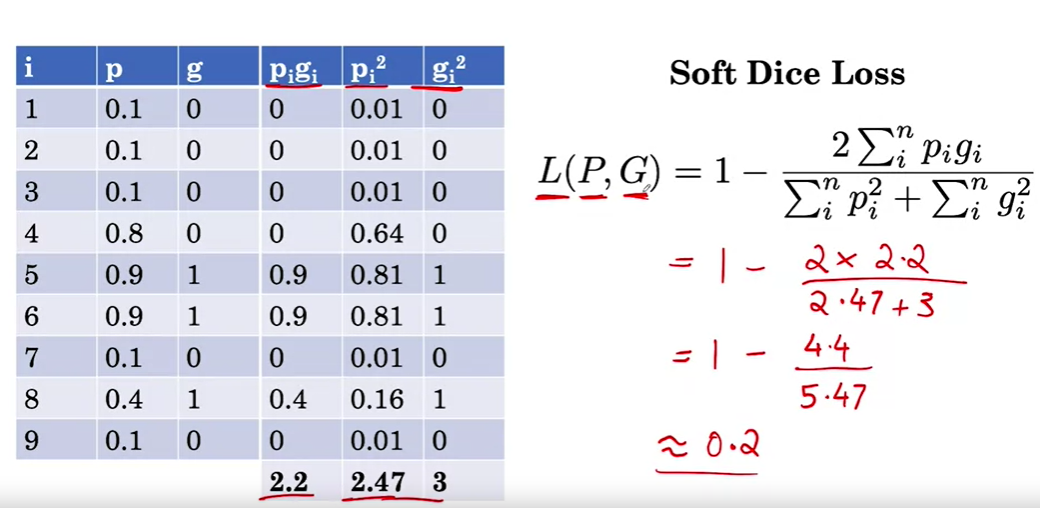

In this section, we discussed the soft dice loss function for image segmentation models, which is commonly used in the presence of imbalanced data. The numerator of the loss is computed by multiplying the prediction map and ground truth map element wise, while the denominator is the sum of squares of the prediction and ground truth maps. The soft dice loss measures the overlap between the prediction and ground truth maps, with a higher loss indicating a smaller overlap and a lower loss indicating a larger overlap. We also saw an example calculation of the soft dice loss for a small 2D image. The model optimizes this loss function during training to produce better segmentations.

### Different Populations and Diagnostic Technology

In medical imaging, it's important to consider the impact of different populations and diagnostic technology on the performance of machine learning models. The performance of a model trained on one population may not generalize well to another population, which can lead to biases and errors in diagnosis. For example, a model trained on a predominantly white population may not perform well on a population with more diverse skin tones due to differences in lighting and contrast.

Diagnostic technology can also impact the performance of machine learning models. For instance, a model trained on CT scans may not perform well on MRI scans due to differences in image resolution, contrast, and noise. Additionally, different diagnostic technologies may be better suited for certain types of tasks. For example, MRI may be better suited for detecting soft tissue abnormalities, while CT may be better suited for detecting bone fractures.

To address these issues, it's important to train machine learning models on diverse and representative populations and to evaluate their performance on a variety of diagnostic technologies. This can help to ensure that the models are robust and reliable across different populations and diagnostic contexts. It's also important to interpret the results of machine learning models in the context of the diagnostic technology being used and to understand the limitations and potential biases of the models.

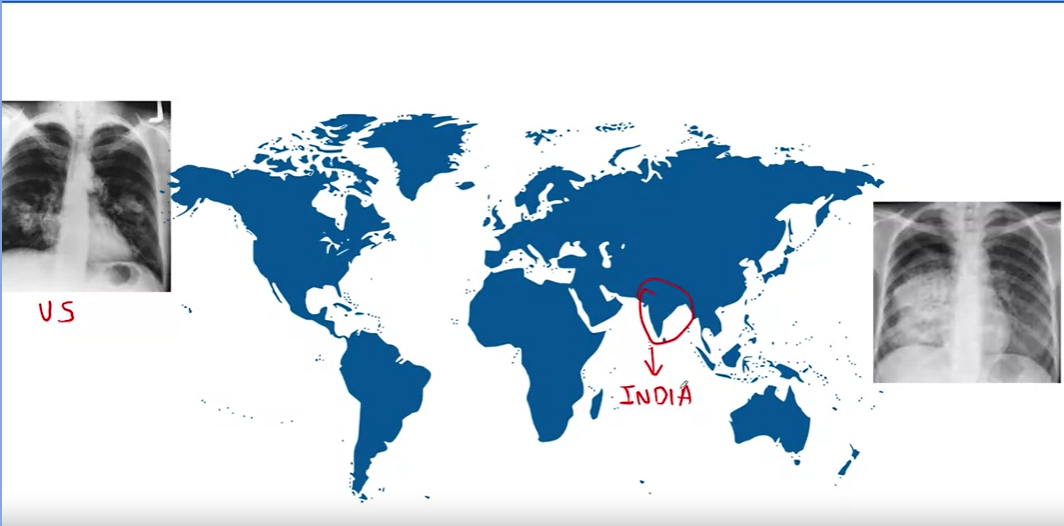

In this lesson, we learn about the challenges and opportunities to make AI algorithms part of routine medical practice. One of the main challenges is achieving reliable generalization, which can be difficult due to differences in patient populations and diagnostic technology. For instance, a chest x-ray model developed on US data may not perform well on x-rays from a different country like India, where tuberculosis is more prevalent. Similarly, MRI technology varies across the globe and across time, and before applying a brain tumor segmentation model in a new hospital, we need to ensure it can generalize to the resolution of the scanner at that hospital.

### External Validation

External validation is an important step in the development of AI algorithms for medical imaging. It involves testing the performance of the model on a dataset that is separate from the dataset that was used to train and validate the model. External validation is important for ensuring that the model is able to generalize to new and unseen data. The external validation dataset should ideally be representative of the patient population that the model will be applied to in clinical practice. This can be challenging, as patient populations can vary across different regions, countries, and healthcare systems.

In addition to testing the model on a new dataset, external validation may also involve comparing the performance of the AI algorithm to that of human experts or other existing diagnostic tools. This can help to identify areas where the model may be particularly useful or where it may have limitations.

Overall, external validation is an essential step in the development and deployment of AI algorithms for medical imaging, as it helps to ensure that the models are safe, effective, and reliable when used in clinical practice.

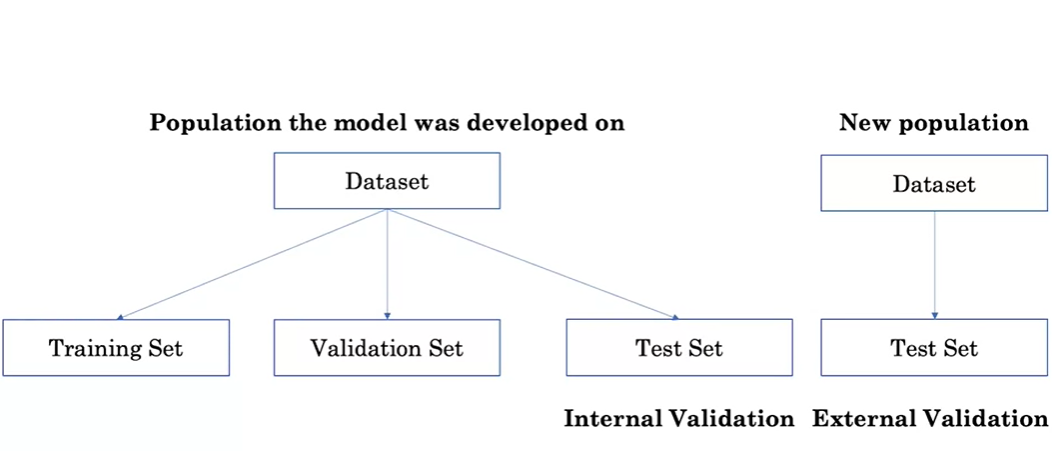

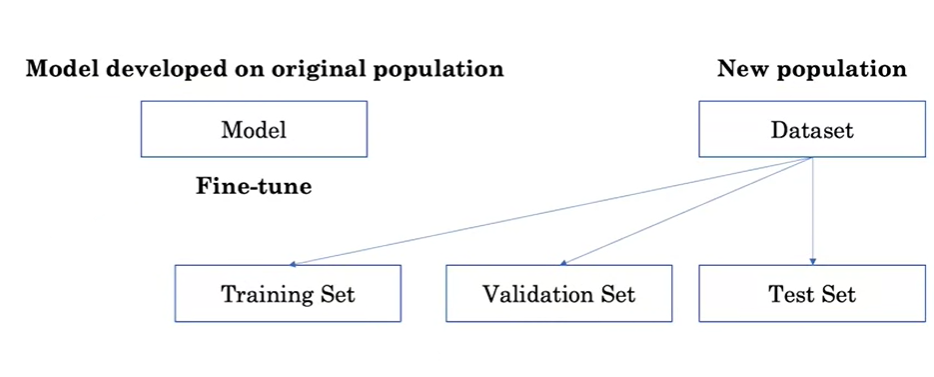

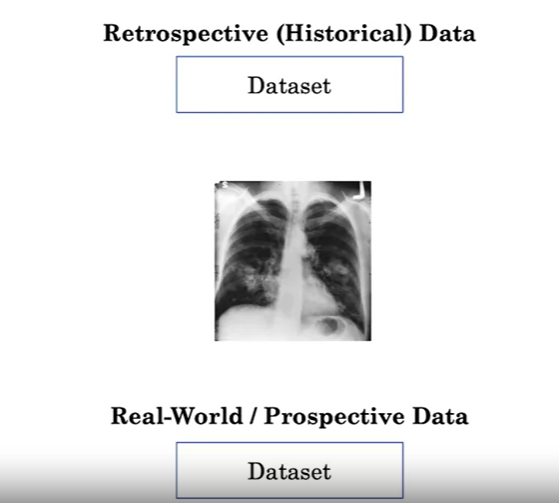

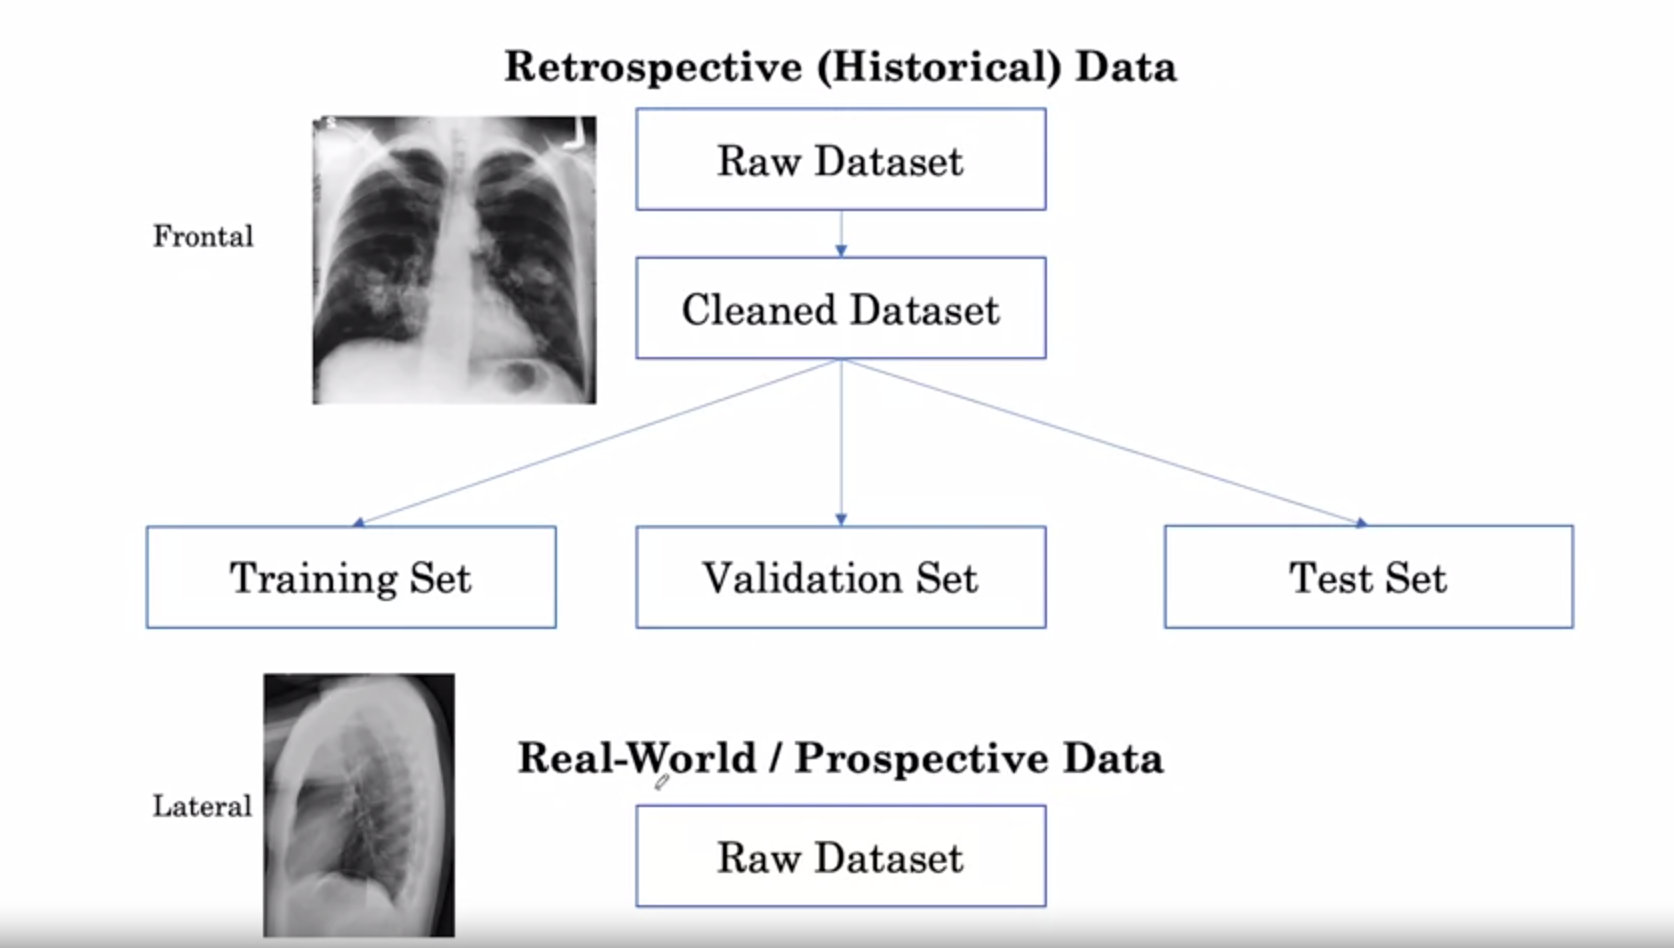

External validation is the process of testing a model's generalization ability on a new population that it hasn't seen before. If the model doesn't generalize well to the new population, we could fine-tune it on a small training and validation set from the new population. Retrospective data is used in studies to train and test algorithms, but for real-world application, prospective data is needed. The result of the model on prospective data might differ from retrospective data due to the raw data being used in the real world, unlike the processed and cleaned retrospective data. Thus, the model needs to be adjusted to work on different types of data such as lateral x-rays.

### Measuring Patient Outcomes

Another important aspect of integrating AI models into medical practice is measuring patient outcomes. It's not enough to have a model that performs well on test sets or even on prospective data; we want to see how well the model helps physicians make better decisions and improve patient outcomes.

To measure patient outcomes, we need to conduct a clinical trial where we compare the outcomes of patients treated with the help of an AI model to those who are treated without the model. Ideally, we would randomly assign patients to the two groups so that we can be sure that any differences in outcomes are due to the use of the model and not some other factor.

Clinical trials can be challenging to conduct, especially for medical imaging where there may be long-term outcomes that are hard to measure, such as the recurrence of cancer. In addition, the use of AI models may change the way that physicians interpret medical images and make decisions, so we need to carefully design the trial to ensure that we're measuring the impact of the model and not just the impact of changing physician behavior.

Despite the challenges, measuring patient outcomes is critical to understanding the utility of AI models in medical practice and ensuring that they are delivering real value to patients.

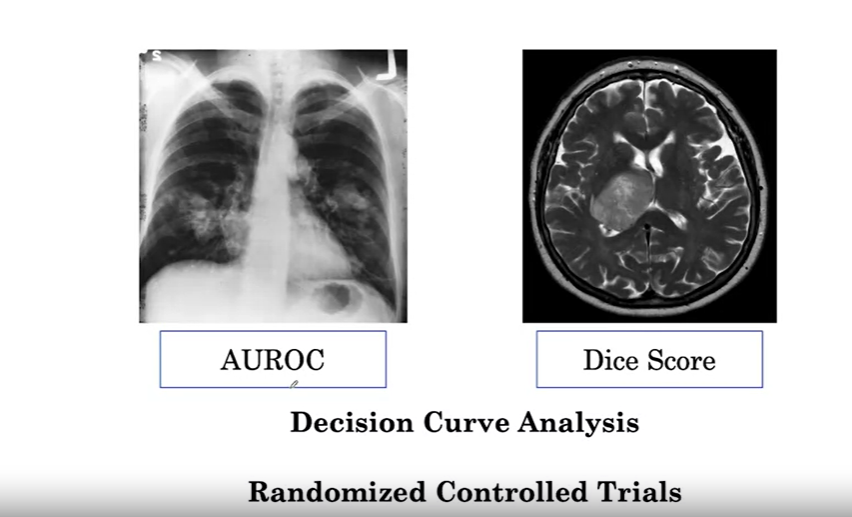

Deploying AI models in the real world for clinical care requires measuring patient outcomes, which is a challenge. We need to use decision curve analysis and randomized control trials to quantify the net benefit of using the model in patient care. We also need to analyze the effect of the model on subgroups of the population to identify algorithmic blind spots and unintended biases. Understanding how AI algorithms interact with the decision-making of clinicians is another challenge. Finally, interpreting the decision-making process of these algorithms is difficult, and there is an open area of research on algorithmic bias.